# Exemplo de um problema de classificação
A intenção desse notebook é exemplificar um pipeline de um problema de classificação. Ainda não se preocupe muito sobre o código. O intuito é observar os conceitos (por enquanto). Na próxima aula já vamos avançar com codificação.

Em resumo, vamos fazer o seguinte:
- Carregar a base *Breast cancer wisconsin*
- Separar os dados em conjunto de treino e teste (por enquanto não vamos usar validação)
- Aplicar uma normalização (vamos aprender mais sobre isso em breve)
- Treinar uma regressão logistica
- Calcular acurácia no conjunto de treino
- Calcular acurácia no conjunto de teste

## Importandos as bibliotecas
Vamos usar basicamente a `sklearn`. No módulo 2 já vamos aprender mais sobre ela. Por enquanto, aceita que ela existe e observe apenas o pipeline.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Carregando os dados

In [12]:
cancer_dataset = load_breast_cancer()
X = cancer_dataset['data']
y = cancer_dataset['target']
nome_labels = cancer_dataset.target_names
print(nome_labels)

['malignant' 'benign']


In [13]:
desc = cancer_dataset['DESCR']
print(desc)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Pre-processamento dos dados
- Dividir o dataset em treino e teste
- Normalizar os dados usando `MinMaxScaler`

In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=32)
print(f"Tamanho do conjunto de treino: {len(X_treino)}")
print(f"Tamanho do conjunto de teste: {len(X_teste)}")

Tamanho do conjunto de treino: 426
Tamanho do conjunto de teste: 143


### Normalizando os dados

In [5]:
normalizador = MinMaxScaler()
normalizador.fit(X_treino)
X_treino_norm = normalizador.transform(X_treino)
X_teste_norm = normalizador.transform(X_teste)

## Configurando e treinando a regressão logística

In [6]:
modelo = LogisticRegression()
modelo.fit(X_treino_norm, y_treino)

LogisticRegression()

### Calculando acurácia de treino e teste

In [7]:
print(f"Acurácia de treinamento: {modelo.score(X_treino_norm, y_treino)}")
print(f"Acurácia de teste: {modelo.score(X_teste_norm, y_teste)}")

Acurácia de treinamento: 0.9694835680751174
Acurácia de teste: 0.972027972027972


### Obtendo a classe de uma dada amostra

In [8]:
k = 12
amostra = X_teste[k]
print("Amostra:\n", amostra)
print("Label:", nome_labels[y_teste[k]])
print("\n---- Normalizando a amostra: ---")
amostra_norm = normalizador.transform([amostra])[0]
print(amostra_norm)

Amostra:
 [1.422e+01 2.785e+01 9.255e+01 6.239e+02 8.223e-02 1.039e-01 1.103e-01
 4.408e-02 1.342e-01 6.129e-02 3.354e-01 2.324e+00 2.105e+00 2.996e+01
 6.307e-03 2.845e-02 3.850e-02 1.011e-02 1.185e-02 3.589e-03 1.575e+01
 4.054e+01 1.025e+02 7.640e+02 1.081e-01 2.426e-01 3.064e-01 8.219e-02
 1.890e-01 7.796e-02]
Label: benign

---- Normalizando a amostra: ---
[0.34260968 0.61345959 0.33694976 0.20394821 0.32149452 0.2592479
 0.25843486 0.21908549 0.14242424 0.23862679 0.08107912 0.55540472
 0.06288015 0.0446378  0.12788532 0.19675849 0.09722222 0.19151354
 0.05583385 0.09307934 0.31044065 0.76012793 0.30571043 0.17826783
 0.18995401 0.20346202 0.24472843 0.28243986 0.06406466 0.15033451]


In [ ]:
lab_pred = modelo.predict([amostra_norm])
prob_pred = modelo.predict_proba([amostra_norm])
print("Label predito:", nome_labels[lab_pred])
print("Probabilidade:", prob_pred[0][1], "%")

Label predito: ['benign']
Probabilidade: 0.5903799576026816 %


# Obtendo a matriz de confusão

In [9]:
from sklearn.metrics import confusion_matrix
pred_teste = modelo.predict(X_teste_norm)
cm = confusion_matrix(y_teste, pred_teste)
cm

array([[53,  3],
       [ 1, 86]])

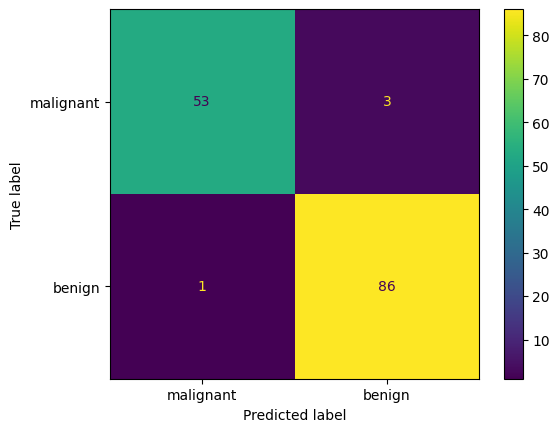

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nome_labels)
disp.plot()

# Obtendo Acurácia, Precision, Recall e F1-score

In [15]:
tn, fp, fn, tp = cm.ravel()
print(f"TP: {tp}\nTN: {tn}\nFP: {fp}\nFN: {fn}")

TP: 86
TN: 53
FP: 3
FN: 1


In [17]:
acc = (tp + tn) / (tp + tn + fp + fn)
print(f"Acuracia: {100 * acc:.2f}%")

Acuracia: 97.20%


In [18]:
precision = tp / (tp + fp)
print(f"Precision: {100 * precision:.2f}%")

Precision: 96.63%


In [19]:
recall = tp / (tp + fn)
print(f"Recall: {100 * recall:.2f}%")

Recall: 98.85%


In [20]:
f1 = 2 * (precision * recall)/(precision + recall)
print(f"F1-score: {100 * f1:.2f}%")

F1-score: 97.73%


### ... ou simplesmente, podemos chamar as funções já prontas

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f"Acuracia: {100 * accuracy_score(y_teste, pred_teste):.2f}%")
print(f"Precision: {100 * precision_score(y_teste, pred_teste):.2f}%")
print(f"Recall: {100 * recall_score(y_teste, pred_teste):.2f}%")
print(f"F1-score: {100 * f1_score(y_teste, pred_teste):.2f}%")

Acuracia: 97.20%
Precision: 96.63%
Recall: 98.85%
F1-score: 97.73%


# Alterando o threshold de classificação

In [24]:
lab_preds = modelo.predict(X_teste_norm)
prob_preds = modelo.predict_proba(X_teste_norm)

print(f"Nome das classes: {nome_labels}\n")
print(f"Predições com threshold de 50%:\n{lab_preds[0:10]}")
print(f"\nProbabilidades:\n{prob_preds[0:10]}")

Nome das classes: ['malignant' 'benign']

Predições com threshold de 50%:
[1 1 1 0 1 1 1 1 1 0]

Probabilidades:
[[0.12251196 0.87748804]
 [0.12389568 0.87610432]
 [0.01709584 0.98290416]
 [0.71328119 0.28671881]
 [0.09170917 0.90829083]
 [0.15201024 0.84798976]
 [0.16350238 0.83649762]
 [0.00675787 0.99324213]
 [0.12797328 0.87202672]
 [0.98112921 0.01887079]]


### Podemos alterar o threshold e selecionar as classes da seguinte forma:

In [25]:
thres = 0.9
lab_preds_90 = [1 if p[1] else 0 for p in (prob_preds >= thres)]
print(f"Predições com threshold de 70%:\n{lab_preds_90[0:10]}")

Predições com threshold de 70%:
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


### Calculando o precision e o recall para os novos thresholds

In [26]:
print(f"Acuracia: {100 * accuracy_score(y_teste, lab_preds_90):.2f}%")
print(f"Precision: {100 * precision_score(y_teste, lab_preds_90):.2f}%")
print(f"Recall: {100 * recall_score(y_teste, lab_preds_90):.2f}%")
print(f"F1-score: {100 * f1_score(y_teste, lab_preds_90):.2f}%")

Acuracia: 83.22%
Precision: 100.00%
Recall: 72.41%
F1-score: 84.00%


# Calculando a Curva ROC e obtendo a AUC

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_teste, prob_preds[:,1])
roc_auc = auc(fpr, tpr)
for k in range(len(fpr)):
  print(f"Threshold = {thresholds[k]} | FPR = {fpr[k]:.2f} | TPR = {tpr[k]:.2f}")

print(f"\nAUC = {roc_auc}")

Threshold = 1.9983971459325223 | FPR = 0.00 | TPR = 0.00
Threshold = 0.9983971459325224 | FPR = 0.00 | TPR = 0.01
Threshold = 0.8364976168558393 | FPR = 0.00 | TPR = 0.84
Threshold = 0.8276864519966676 | FPR = 0.02 | TPR = 0.84
Threshold = 0.6531781447873287 | FPR = 0.02 | TPR = 0.95
Threshold = 0.6106312984830717 | FPR = 0.04 | TPR = 0.95
Threshold = 0.5621377770820221 | FPR = 0.04 | TPR = 0.99
Threshold = 0.5479075263256283 | FPR = 0.05 | TPR = 0.99
Threshold = 0.49512401748975277 | FPR = 0.05 | TPR = 1.00
Threshold = 2.5603773311706074e-07 | FPR = 1.00 | TPR = 1.00

AUC = 0.9961001642036125


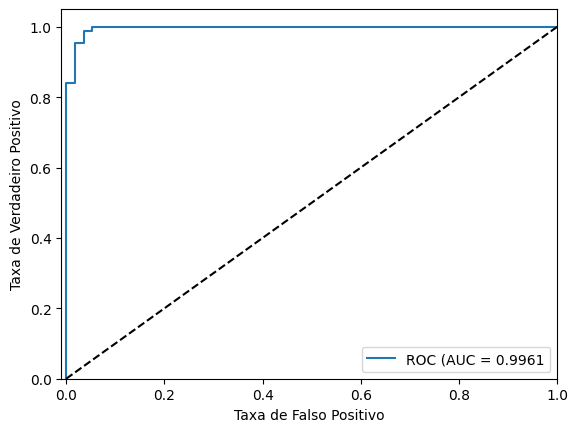

In [28]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="k", linestyle="--")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.legend(loc="lower right")
plt.show()